In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.utils import resample

import matplotlib.pyplot as plt

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

In [ ]:
# Load the dataset
dataset = pd.read_csv('/content/chess_king_rook_dataset.csv')

In [ ]:
# Replace chess board positions and result labels as you did in your original code

dataset['white_king_file'] = dataset['white_king_file'].replace(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ['1', '2', '3', '4', '5', '6', '7', '8'])

dataset['white_rook_file'] = dataset['white_rook_file'].replace(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ['1', '2', '3', '4', '5', '6', '7', '8'])

dataset['black_king_file'] = dataset['black_king_file'].replace(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'], ['1', '2', '3', '4', '5', '6', '7', '8'])

dataset['result'] = dataset['result'].replace(
    ['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve',
     'thirteen', 'fourteen', 'fifteen', 'sixteen'],
    ['17', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16'])

print (dataset)

      white_king_file  white_king_rank white_rook_file  white_rook_rank  \
0                   1                1               2                3   
1                   1                1               3                1   
2                   1                1               3                1   
3                   1                1               3                1   
4                   1                1               3                2   
...               ...              ...             ...              ...   
28051               2                1               7                7   
28052               2                1               7                7   
28053               2                1               7                7   
28054               2                1               7                7   
28055               2                1               7                7   

      black_king_file  black_king_rank result  
0                   3                2     17  
1  

In [ ]:
# Check for missing values
print(dataset.isnull().sum())

white_king_file    0
white_king_rank    0
white_rook_file    0
white_rook_rank    0
black_king_file    0
black_king_rank    0
result             0
dtype: int64


In [ ]:
# Split the dataset into features (X) and target (y)
y = dataset['result']
X = dataset.drop('result', axis=1)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=85)

In [ ]:
# Initialize SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_y_predict = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_predict)
print(svm_accuracy)

cm_svm = confusion_matrix(y_test, svm_y_predict)


0.5441910192444761


0.5324305060584463


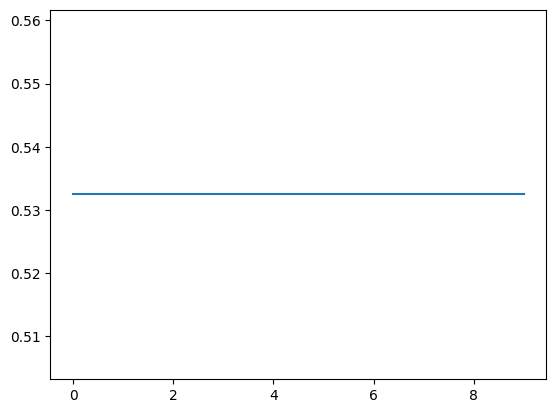

In [ ]:
n_bootstrap_samples = 10  # Number of bootstrap samples
bootstrap_accuracy = []

for _ in range(n_bootstrap_samples):

    X_boot, y_boot = resample(X_train, y_train, random_state=42)

    svm_model.fit(X_boot, y_boot)

    svm_y_predict = svm_model.predict(X_test)

    bootstrap_accuracy.append(accuracy_score(y_test, svm_y_predict))

# Calculate the average accuracy from bootstrapping
average_svm_accuracy = sum(bootstrap_accuracy) / len(bootstrap_accuracy)
print(average_svm_accuracy)

bcm_svm = confusion_matrix(y_test, svm_y_predict)

c=range(n_bootstrap_samples )
plt.plot(c,bootstrap_accuracy)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_predict = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_predict)
print(knn_accuracy)

cm_knn = confusion_matrix(y_test, knn_y_predict)

0.759800427655025


In [ ]:
# Initialize KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)

0.5694939415538001


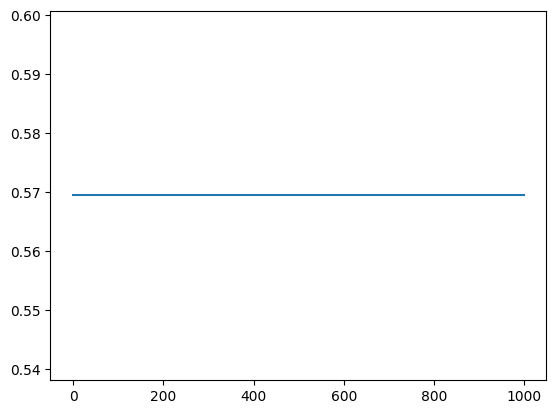

In [ ]:

n_bootstrap_samples = 1000
bootstrap_accuracy = []

for _ in range(n_bootstrap_samples):
    X_boot, y_boot = resample(X_train, y_train, random_state=42)

    knn_model.fit(X_boot, y_boot)

    knn_y_predict = knn_model.predict(X_test)

    bootstrap_accuracy.append(accuracy_score(y_test, knn_y_predict))

average_knn_accuracy = sum(bootstrap_accuracy) / len(bootstrap_accuracy)
print(average_knn_accuracy)

bcm_knn = confusion_matrix(y_test, knn_y_predict)

c=range(n_bootstrap_samples )
plt.plot(c,bootstrap_accuracy)

In [ ]:
# Create a bar chart to compare SVM and KNN accuracies
methods = ['SVM','KNN','SVM (with Bootstrap)','KNN (with Bootstrap)']
accuracies = [svm_accuracy, knn_accuracy , average_knn_accuracy,average_knn_accuracy]

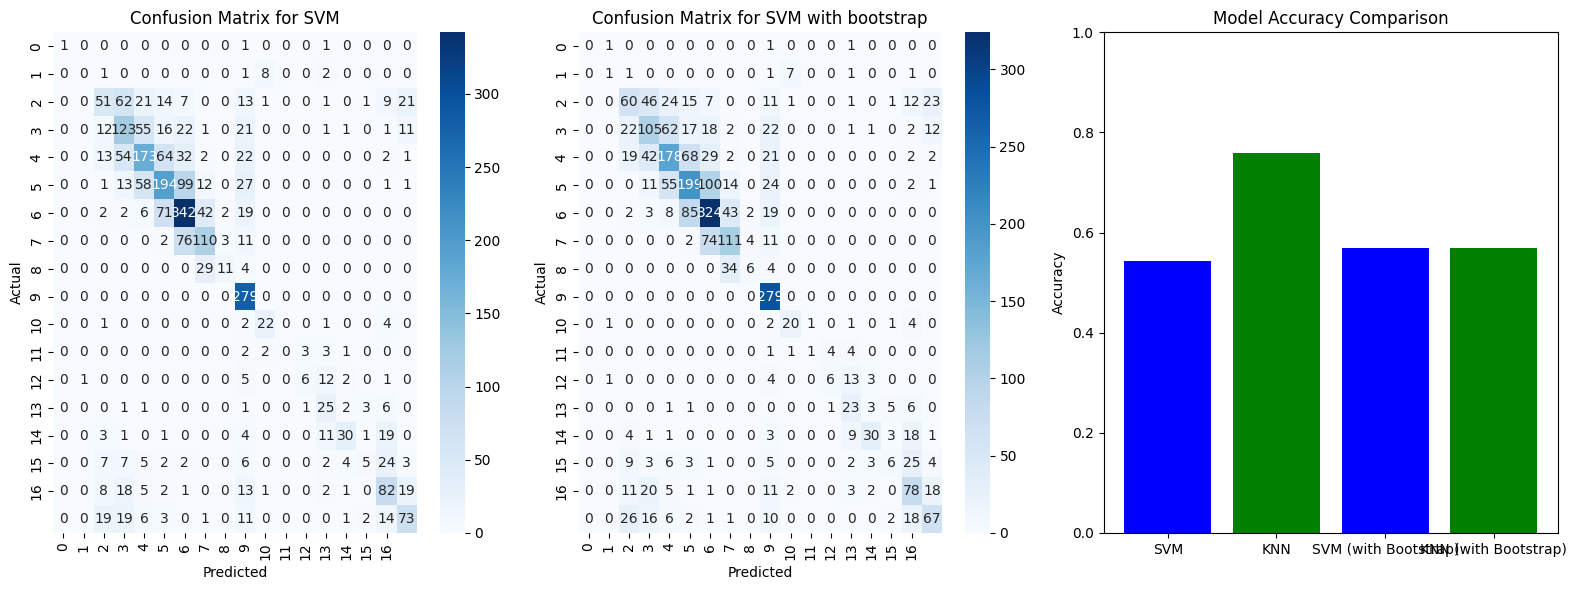

In [ ]:
# Plot the results
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(17)], yticklabels=[str(i) for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')

plt.subplot(1, 3, 2)
sns.heatmap(bcm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(17)], yticklabels=[str(i) for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM with bootstrap')
"""
plt.subplot(1, 3, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(17)], yticklabels=[str(i) for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')

plt.subplot(1, 3, 2)
sns.heatmap(bcm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=[str(i) for i in range(17)], yticklabels=[str(i) for i in range(17)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN with bootstrap')
"""
plt.subplot(1, 3, 3)
plt.bar(methods, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
